# Black Friday Dataset EDA And Feature Engineering
## Cleaning and preparing the data for model training

### Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

# 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the dataset
df_train = pd.read_csv("train.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# importing the test dataset
df_test = pd.read_csv("test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


# 

In [4]:
## here we will concate or append both files or merge 

# df = pd.concat([df_train,df_test])
# df = df_train.append(df_test)
df = df_train.merge(df_test,how='outer')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


# 

In [5]:
## droping the unrequired columns
df.drop(["User_ID"],axis=1,inplace=True)

In [6]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


# 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  object 
 2   Age                         783667 non-null  object 
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 71.7+ MB


In [8]:
''' as we know our model don't understand categorical values
    so here we need to change these categorrical(object) values to int values   '''
## handling categorical feature Gender
## changing F = 0 and M = 1
df.Gender = df.Gender.map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


# 

In [9]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [10]:
## changing Categorical feature Age
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'45-50':5,'51-55':6,'55+':7})


In [11]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1.0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1.0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1.0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1.0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7.0,16,C,4+,0,8,NaN,NaN,7969.0


# 

In [12]:
df.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [13]:
## changing categorical City_category
## drop_first : if we have 3 category then 2 categories are enough to represent all 3 categories
## get_dummies will only create the dummmies, we need to add these to our data
## if we run this cell we will get error because we removed City_Category permanently
df_city = pd.get_dummies(df["City_Category"],drop_first=True)

In [14]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [15]:
## adding those dummies to data
df = pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1.0,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1.0,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1.0,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1.0,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7.0,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [16]:
## now drop City_category as we created its dummies
df.drop(['City_Category'],axis=1,inplace=True)

In [17]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1.0,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1.0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1.0,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1.0,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7.0,16,4+,0,8,NaN,NaN,7969.0,0,1


# 

In [18]:
## find the numbers of Missing Values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                            65278
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [19]:
## we can also get the columns where the null value occurs
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i)

Age
Product_Category_2
Product_Category_3
Purchase


# 

In [20]:
## replacing the missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [21]:
## Replace the missing values with mode
df_mode1= df['Product_Category_2'].mode()
df_mode1

0    8.0
dtype: float64

In [22]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df_mode1[0])

In [23]:
df['Product_Category_2'].isnull().sum()

0

# 

In [24]:
## similarlly for Product_Category_3
df["Product_Category_3"].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [25]:
df_mode2 = df["Product_Category_3"].mode()
df_mode2

0    16.0
dtype: float64

In [26]:
df["Product_Category_3"] = df["Product_Category_3"].fillna(df_mode2[0])

In [27]:
df["Product_Category_3"].isnull().sum()

0

# 

In [28]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1.0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1.0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1.0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1.0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7.0,16,4+,0,8,8.0,16.0,7969.0,0,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         718389 non-null  float64
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(4), int64(4), object(2), uint8(2)
memory usage: 67.3+ MB


#### as we can see only "Stay_In_Current_City_Years "  is object dtype

# 

In [30]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [31]:
## replacing + 

df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].str.replace('+','')
df["Stay_In_Current_City_Years"]

0         2
1         2
2         2
3         2
4         4
         ..
783662    4
783663    4
783664    4
783665    4
783666    4
Name: Stay_In_Current_City_Years, Length: 783667, dtype: object

In [32]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1.0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1.0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1.0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1.0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7.0,16,4,0,8,8.0,16.0,7969.0,0,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         718389 non-null  float64
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(4), int64(4), object(2), uint8(2)
memory usage: 67.3+ MB


In [34]:
## convert object into int
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].astype(int)
df["B"] = df["B"].astype(int)
df["C"] = df["C"].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         718389 non-null  float64
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(4), int32(3), int64(4), object(1)
memory usage: 68.8+ MB


# 

In [35]:
# sns.pairplot(df)

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

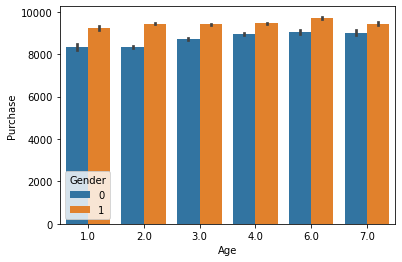

In [36]:
sns.barplot(x='Age',y='Purchase',hue="Gender",data=df)

#### Observation: Purchasing of male is higher than female

# 

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

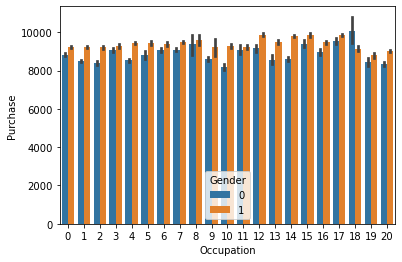

In [37]:
sns.barplot(x='Occupation',y='Purchase',hue="Gender",data=df)


# 

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

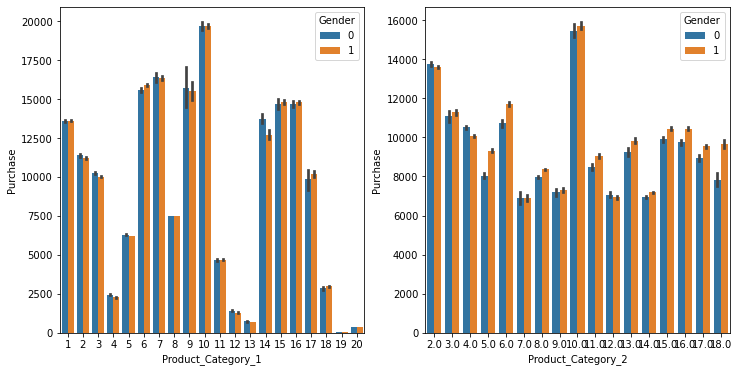

In [38]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(x='Product_Category_1',y='Purchase',hue="Gender",data=df)

plt.subplot(1,2,2)
sns.barplot(x='Product_Category_2',y='Purchase',hue="Gender",data=df)


# 

In [39]:
## we can also drop Product_ID as no useffull data is there
df.drop(["Product_ID"],axis=1,inplace=True)

In [40]:
df

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1.0,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1.0,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1.0,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1.0,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7.0,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
783662,0,3.0,15,4,1,8,8.0,16.0,NaN,1,0
783663,0,3.0,15,4,1,5,8.0,16.0,NaN,1,0
783664,0,3.0,15,4,1,1,5.0,12.0,NaN,1,0
783665,0,NaN,1,4,0,10,16.0,16.0,NaN,0,1


# 

In [63]:
## Getting the data where Purchase value is null
df[df['Purchase'].isnull()]

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
550068,1,NaN,7,2,1,1,11.0,16.0,NaN,1,0
550069,1,3.0,17,0,0,3,5.0,16.0,NaN,0,1
550070,0,4.0,1,4,1,5,14.0,16.0,NaN,1,0
550071,0,4.0,1,4,1,4,9.0,16.0,NaN,1,0
550072,0,3.0,1,1,0,4,5.0,12.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...
783662,0,3.0,15,4,1,8,8.0,16.0,NaN,1,0
783663,0,3.0,15,4,1,5,8.0,16.0,NaN,1,0
783664,0,3.0,15,4,1,1,5.0,12.0,NaN,1,0
783665,0,NaN,1,4,0,10,16.0,16.0,NaN,0,1


In [64]:
## Getting the data where Purchase value is not null
df[~df['Purchase'].isnull()]

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1.0,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1.0,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1.0,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1.0,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7.0,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
550063,1,6.0,13,1,1,20,8.0,16.0,368.0,1,0
550064,0,3.0,1,3,0,20,8.0,16.0,371.0,0,1
550065,0,3.0,15,4,1,20,8.0,16.0,137.0,1,0
550066,0,7.0,1,2,0,20,8.0,16.0,365.0,0,1


# 